In [3]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.13949636660880768 
volatility=0.017793899652989272
# HW = HullWhite(initial=0.02459103, reversion=0.03, volatility=0.00200, Gamma=1000, b=beta, tau=tau)
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
Kswap=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]
Kswpt=fsolve(lambda x: HW.swap(0, S+5, T+5, x), x0=0.02)[0]
time,float = HW.create_path(1/365,10,0)
swap = HW.swapextended(0, S, T, Kswap, floatRate=float, schedule=time)
swpt = HW.swaption(0, Te=5, S=S+5, T=T+5, K=Kswpt, floatRate=float, schedule=time)
simTable = pd.read_csv('SimulationTimes.txt')
simTable['Time'] = round(simTable['Time'],2)
simTable['CVACONF'] = round((simTable['CVAUB']/simTable['CVA']-1)*100,4)
simTable['DVACONF'] = round((simTable['DVALB']/simTable['DVA']-1)*100,4)
simTable['CVA'] = simTable['CVA']*1000000
simTable['DVA'] = simTable['DVA']*1000000
simTable['CVAUB'] = simTable['CVAUB']*1000000
simTable['CVALB'] = simTable['CVALB']*1000000
simTable['DVAUB'] = simTable['DVAUB']*1000000
simTable['DVALB'] = simTable['DVALB']*1000000

# simTable.drop(['CVAUB', 'CVALB', 'DVAUB', 'DVALB'], axis=1, inplace=True)
# simTable['V0']=np.where('Swaption' in simTable['Product'], "swpt", "swap")
simTable['V0'] = np.where(simTable['Product'].str.contains('Swaption'), 'swpt', 'swap')
simTable['VM'] = np.where(simTable['Product'].str.contains('VM'), 1, 0)
simTable['IM'] = np.where(simTable['Product'].str.contains('IM'), 1, 0)
simTable.sort_values(['Product', 'dt'], ascending=True, inplace=True)
simTable.reset_index(drop=True, inplace=True)
simTable.drop_duplicates(subset=['Product', 'dt'], keep='last')

,N,dt,CVA,CVAUB,CVALB,DVA,DVAUB,DVALB,Product,Time,CVACONF,DVACONF,V0,VM,IM
0,5000,1,-4475.733081,-4793.049149,-4158.417013,5383.085383,5084.103870,5682.066896,10Y Payer Swap Exposure,3.42,7.0897,5.5541,swap,0,0
1,5000,2,-4743.447121,-5065.770066,-4421.124175,5150.220212,4853.768582,5446.671842,10Y Payer Swap Exposure,5.94,6.7951,5.7561,swap,0,0
3,5000,4,-4990.114329,-5315.562951,-4664.665706,4711.205609,4429.530031,4992.881188,10Y Payer Swap Exposure,9.81,6.5219,5.9788,swap,0,0
6,5000,12,-5421.213104,-5757.058288,-5085.367920,4243.286885,3977.233912,4509.339858,10Y Payer Swap Exposure,26.76,6.1950,6.2700,swap,0,0
7,5000,365,-5909.036214,-6255.943488,-5562.128939,3815.381121,3560.788156,4069.974085,10Y Payer Swap Exposure,558.73,5.8708,6.6728,swap,0,0
8,5000,1,-2888.707699,-3124.575912,-2652.839486,1832.495790,1688.471586,1976.519994,10Y Payer Swap with VM,5.97,8.1652,7.8595,swap,1,0
9,5000,2,-130.429841,-146.281683,-114.577999,144.867220,131.074051,158.660389,10Y Payer Swap with VM,9.93,12.1535,9.5212,swap,1,0
10,5000,4,-135.304692,-150.358558,-120.250826,123.538681,111.709707,135.367655,10Y Payer Swap with VM,19.91,11.1259,9.5751,swap,1,0
11,5000,12,-136.852391,-150.769807,-122.934975,104.438634,94.391255,114.486013,10Y Payer Swap with VM,58.01,10.1697,9.6204,swap,1,0
12,5000,365,-165.590765,-181.644771,-149.536759,89.716201,81.429702,98.002699,10Y Payer Swap with VM,760.34,9.6950,9.2363,swap,1,0


In [80]:
from joblib import load
EPE =  load("./SimulationData/PE_10Y_Swap_N=100000_dt=365.joblib")
ENE =  load("./SimulationData/NE_10Y_Swap_N=100000_dt=365.joblib")
EPE

array([0.        , 0.00162555, 0.0022995 , ..., 0.00184863, 0.00184909,
       0.        ])

<Axes: xlabel='dt', ylabel='CVAUB'>

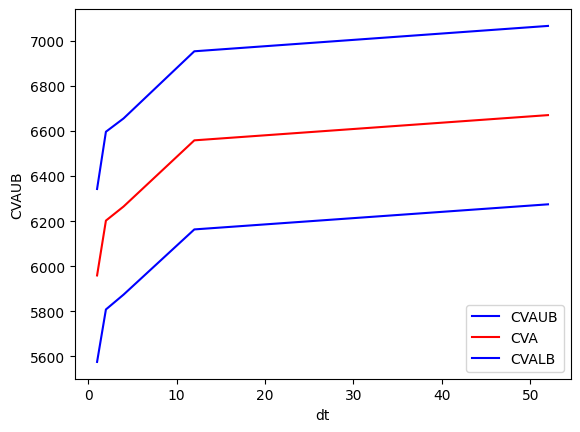

In [68]:
import seaborn as sns
sns.lineplot(x='dt', y='CVAUB', data=simTable.iloc[0:5], color='blue', label='CVAUB')
sns.lineplot(x='dt', y='CVA', data=simTable.iloc[0:5], color='red', label='CVA')
sns.lineplot(x='dt', y='CVALB', data=simTable.iloc[0:5], color='blue', label='CVALB')